images(x)shape:(1797, 8, 8)
target(y)shape:(1797,)
After Reshape=(1797, 64)
(1437, 64)
(360, 64)
Train Accuracy=1.0
test Accuracy=0.9861111111111112


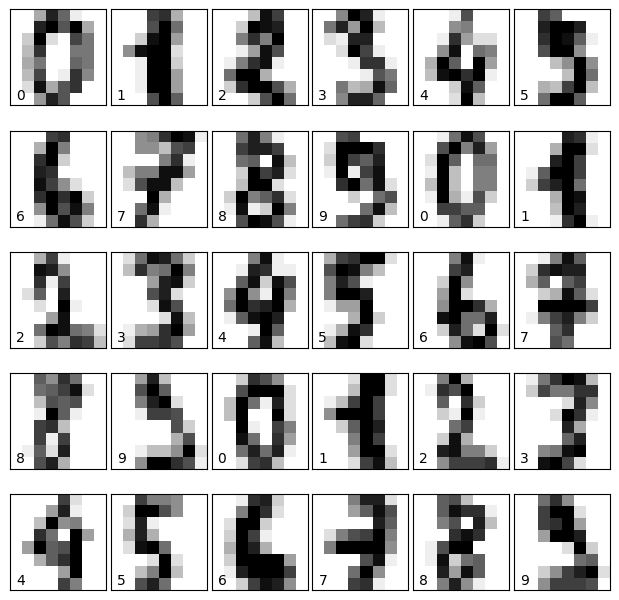

In [ ]:
'''
1. Implement multilayer perceptron algorithm for MNIST Hand written Digit Classification.
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split,validation_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
digits=datasets.load_digits()
X=digits["images"]
y=digits["target"]
target_names=digits['target_names']
print(f'images(x)shape:{X.shape}')
print(f'target(y)shape:{y.shape}')
fig=plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(30):
  ax=fig.add_subplot(5,6,i+1,xticks=[],yticks=[])
  ax.imshow(X[i],cmap=plt.cm.binary,interpolation ='nearest')
  ax.text(0,7,str(y[i]))
n_samples=len(X)
X=X.reshape(n_samples,-1)
print(f"After Reshape={X.shape}")
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)
print(X_train.shape)
print(X_test.shape)
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
clf=MLPClassifier()
clf.fit(X_train,y_train)
print(f'Train Accuracy={clf.score(X_train,y_train)}')
print(f'test Accuracy={clf.score(X_test,y_test)}')



In [ ]:
"2. Design a neural network for classifying movie reviews (Binary Classification) using IMDB dataset. "

import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb
(training_data,training_targets),(testing_data,testing_targets)=imdb.load_data(num_words=10000)
data=np.concatenate((training_data,testing_data),axis=0)
targets=np.concatenate((training_targets,testing_targets),axis=0)
def vectorize(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
        return results
data=vectorize(data)
targets=np.array(targets).astype("float32")
test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]
model = models.Sequential()
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
results = model.fit(train_x, train_y,epochs= 2,batch_size = 500,validation_data = (test_x, test_y))
print("Test-Accuracy:", np.mean(results.history["val_accuracy"]))


17464789/17464789 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500050    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                         

2110848/2110848 [==============================] - 0s 0us/step
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
Epoch 1/10
16/16 [==============================] - 2s 70ms/step - loss: 2.7421 - accuracy: 0.4949 - val_loss: 1.8257 - val_accuracy: 0.6170
Epoch 2/10
16/16 [==============================] - 1s 58ms/step - loss: 1.5257 - accuracy: 0.6771 - val_loss: 1.3512 - val_accuracy: 0.6760
Epoch 3/10
16/16 [==============================] - 1s 87ms/step - loss: 1.1597 - accuracy: 0.7474 - val_loss: 1.1740 - val_accuracy: 0.7470
Epoch 4/10
16/16 [==============================] - 1s 84ms/step - loss: 0.9488 - accuracy: 0.7974 - val_loss: 1.0546 - val_accuracy: 0.7610
Epoch 5/10
16/16 [==============================] - 1s 64ms/step - loss: 0.7868 - accuracy: 0.8329 - val_loss: 0.9725 - val_accuracy: 0.7850
Epoch 6/10
16/16 [==============================] - 1s 51ms/step - loss: 0.6543 - accur

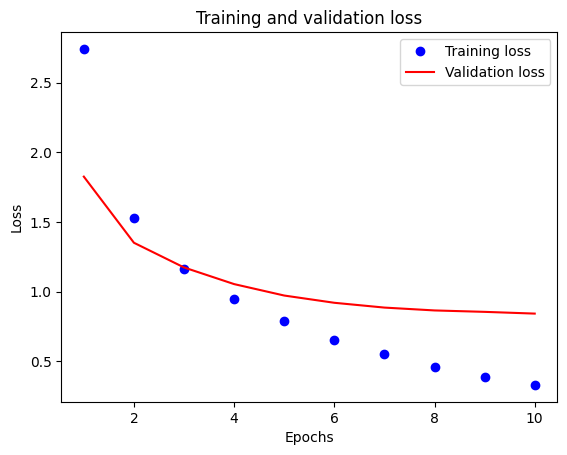

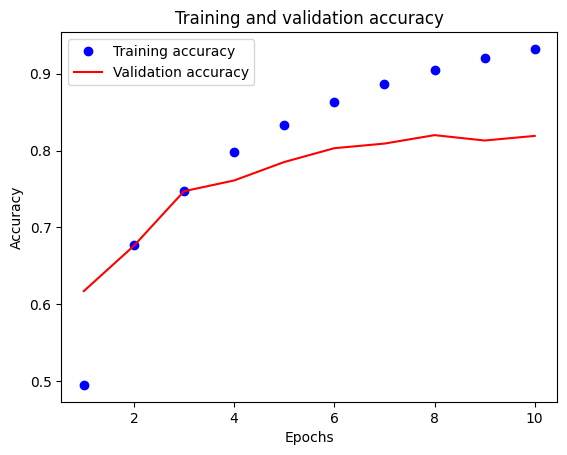

In [ ]:
'''3. Design a neural Network for classifying news wires (Multi class classification) using Reuters
dataset.'''

import numpy as np
import pandas as pd
import warnings
import tensorflow as tf
import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
len(train_data),len(test_data)
print(train_data[10])
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)#1
x_test = vectorize_sequences(test_data)#2
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)#1
one_hot_test_labels = to_one_hot(test_labels)#2
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
model = keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



2.15.0
57026/57026 [==============================] - 0s 0us/step

.
.
.
.
.
.

<ipython-input-5-11f4b47cb7ff>:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rmse_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))



Root Mean Square Error: 2.488 on Validation Set


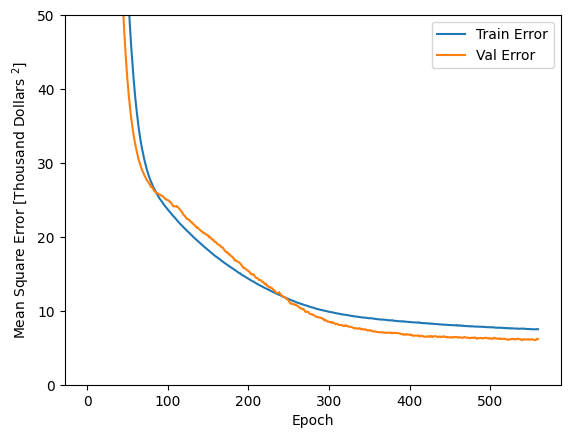

4/4 [==============================] - 0s 4ms/step - loss: 16.1943 - mean_squared_error: 16.1943 - mae: 2.6773
Root Mean Square Error: 4.024


In [ ]:
'''
4. Design a neural network for predicting house prices using Boston Housing Price dataset.
'''
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.metrics import MeanSquaredError  # For custom metric (Solution 2)

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import IPython

from six.moves import urllib

print(tf.__version__)

(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# Get Per-feature Statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features_norm = (train_features - train_mean) / train_std

def build_model():
  model = keras.Sequential([
      Dense(20, activation=tf.nn.relu, input_shape=[len(train_features_norm[0])]),
      Dense(1)
  ])
  # Choose one solution based on your preference (commented out the other)
  # Solution 1: Use 'loss' for training MSE (remove custom metric)
  # model.compile(optimizer='adam', loss='mse', metrics=['mae'])

  # Solution 2: Add custom metric (commented out Solution 1)
  mse_metric = MeanSquaredError(name='mean_squared_error')
  model.compile(optimizer='adam', loss='mse', metrics=[mse_metric, 'mae'])
  return model

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0:
      print('')
      print('.', end='')

model = build_model()

# Reduce patience to allow training for more epochs potentially capturing validation scores
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_features_norm, train_labels,
                    epochs=1000, verbose=0, validation_split=0.1, callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Try using val_mse, fallback to val_mean_squared_error if not available
try:
  rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
except KeyError:
  rmse_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))

print()
print("Root Mean Square Error: {:.3f} on Validation Set".format(rmse_final))

def plot_history():
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [Thousand Dollars $^2$]')
  plt.plot(hist['epoch'], hist['loss'], label='Train Error')  # Use 'loss' if Solution 1 is chosen
  # plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')  # Use this if Solution 2 is chosen
  plt.plot(hist['epoch'], hist['val_mean_squared_error'], label='Val Error')
  plt.legend()
  plt.ylim([0, 50])
  plt.show()

plot_history()

test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)

mse = np.sqrt(mse)
print("Root Mean Square Error: {:.3f}".format(round(mse, 3)))




11490434/11490434 [==============================] - 0s 0us/step
> 98.650
> 98.675
> 98.458
> 98.783
> 98.642


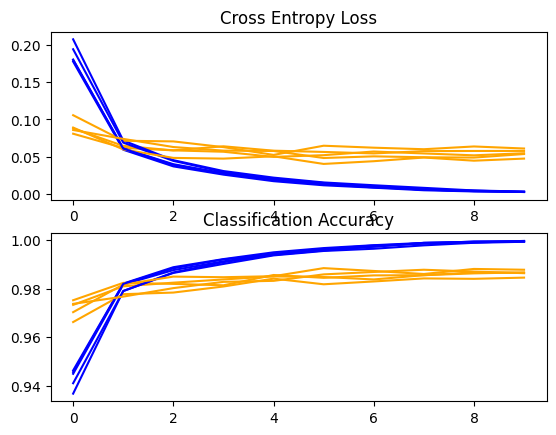

Accuracy: mean=98.642 std=0.105, n=5


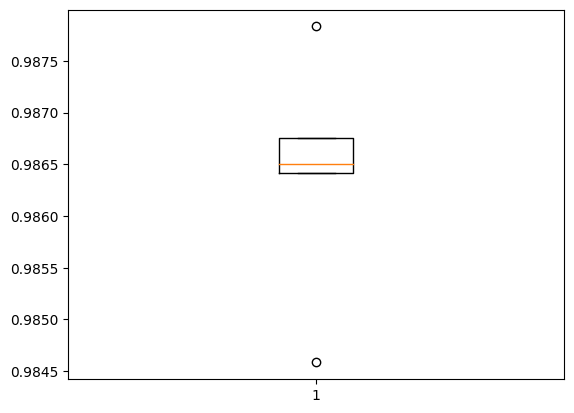

In [ ]:
'''
5. Build a Convolution Neural Network for MNIST Hand written Digit Classification.
'''
from numpy import mean, std
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

def load_dataset():
    (train_X, train_y), (test_X, test_y) = mnist.load_data()
    train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
    test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))
    train_y = to_categorical(train_y)
    test_y = to_categorical(test_y)
    return train_X, train_y, test_X, test_y

def prep_pixels(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def evaluate_model(data_X, data_y, n_folds=5):
    scores, histories = [], []
    k_fold = KFold(n_folds, shuffle=True, random_state=1)
    for train_iX, test_iX in k_fold.split(data_X):
        model = define_model()
        train_X, train_y, test_X, test_y = data_X[train_iX], data_y[train_iX], data_X[test_iX], data_y[test_iX]
        history = model.fit(train_X, train_y, epochs=10, batch_size=32, validation_data=(test_X, test_y), verbose=0)
        _, acc = model.evaluate(test_X, test_y, verbose=0)
        print("> %.3f" % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
    return scores, histories

def summarize_diagnostics(histories):
    for i in range(len(histories)):
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

def summarize_performance(scores):
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    plt.boxplot(scores)
    plt.show()

def run_test_harness():
    train_X, train_y, test_X, test_y = load_dataset()
    train_X, test_X = prep_pixels(train_X, test_X)
    scores, histories = evaluate_model(train_X, train_y)
    summarize_diagnostics(histories)
    summarize_performance(scores)

# Correct place to call run_test_harness
run_test_harness()


In [ ]:
'''
6. Build a Convolution Neural Network for simple image (dogs and Cats) Classification
'''
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from zipfile import ZipFile

data_path = '/content/dog-vs-cat-classification.zip'
with ZipFile(data_path, 'r') as zip_ref:
    zip_ref.extractall()
print("The dataset has been extracted")

path = 'dog-vs-cat-classification'
classes = os.listdir(path)
print(classes)

fig = plt.gcf()
fig.set_size_inches(16, 16)
cat_dir = os.path.join(path, 'Cat')
dog_dir = os.path.join(path, 'Dog')

cat_names = os.listdir(cat_dir)
pic_index = 210
cat_images = [os.path.join(cat_dir, frame) for frame in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, frame) for frame in cat_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img)

plt.show()

base_dir = 'dog-vs-cat-classification'
train_datagen = image_dataset_from_directory(
    base_dir, image_size=(200, 200), subset='training', seed=1, validation_split=0.1, batch_size=32)
test_datagen = image_dataset_from_directory(
    base_dir, image_size=(200, 200), subset='validation', seed=1, validation_split=0.1, batch_size=32)

model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(52, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='Adam', metrics=['accuracy'])

history = model.fit(train_datagen, epochs=5, validation_data=test_datagen)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.show()

history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

test_image = image.load_img(os.path.join(cat_dir, '1.jpg'), target_size=(200, 200))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
if result[0][0] >= 0.5:
    print("Dog")
else:
    print("Cat")

test_image = image.load_img(os.path.join(dog_dir, 'test/2.jpg'), target_size=(200, 200))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
if result[0][0] >= 0.5:
    print("Dog")
else:
    print("Cat")

BadZipFile: File is not a zip file

In [ ]:
"7. Use a pre-trained convolution neural network (VGG16) for image classification."
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16

model = VGG16()

image = load_img('C:/Users/boyel/Desktop/img.jpg', target_size=(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%2f%%)' % (label[1], label[2] * 100))

553467096/553467096 [==============================] - 4s 0us/step


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/boyel/Desktop/img.jpg'

In [ ]:
"8. Implement one hot encoding of words or characters. "
import numpy as np


#define input string

data = "hello world"

point = data

#define universe of possible input values

alphabet = 'abcdefghijklmnopqrstuvwxyz '

#define a mapping of chars to integers.

char_to_int = dict((c, i) for i, c in enumerate(alphabet))

int_to_char = dict((i, c) for i, c in enumerate(alphabet))

#integer encode input data

integer_encoded = [char_to_int[char] for char in data]

print("Integer-encoded:", integer_encoded)

# one hot encode

onehot_encoded = list()

for value in integer_encoded:

    letter = [0 for _ in range(len(alphabet))]

    letter[value] = 1

    onehot_encoded.append(letter)

print("Onehot-encoded:", onehot_encoded)

#invert encoding

inverted = int_to_char[np.argmax(onehot_encoded[0])]

print("Inverted:", inverted)

Integer-encoded: [7, 4, 11, 11, 14, 26, 22, 14, 17, 11, 3]
Onehot-encoded: [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
Inverted: h

17464789/17464789 [==============================] - 0s 0us/step
[1, 13, 28, 1039, 7, 14, 23, 1856, 13, 104, 36, 4, 699, 8060, 144, 297, 14, 175, 291, 18, 4, 375, 1784, 153, 38, 15, 75, 92, 859, 51, 16, 5, 15, 75, 377, 24, 8, 81, 4, 172, 2497, 174, 40, 1489, 49, 84, 11, 4, 2030, 3039, 121, 36, 92, 4881, 14, 20, 2, 9, 40, 6, 2, 621, 18, 148, 37, 191, 1941, 42, 511, 14, 20, 9, 17, 76, 253, 17, 269, 8, 3336, 4, 2, 8, 1278, 6, 543, 2647, 10, 10, 308, 3102, 2, 47, 43, 188, 46, 7, 1172, 5, 240, 2854, 145, 8, 4, 154, 3243, 11, 4819, 58, 18, 35, 32, 8, 327, 823, 7, 7350, 7, 265, 308, 1828, 145, 1646, 4, 154, 890, 5, 9, 14412, 34, 362, 2515, 154, 1914, 5, 27, 15227, 2, 17, 36, 837, 5, 1941, 32, 367, 4, 96, 10, 10, 13, 62, 386, 14, 48, 13, 16, 3178, 42, 48, 11, 882, 294, 16, 3412, 2, 4360, 2, 34, 6, 1042, 18, 2, 345, 96, 14, 9, 6, 862, 526, 3757, 917, 5, 60, 1055, 13, 115, 197, 474, 1829, 15, 2006, 7, 6791, 113, 19, 4, 2, 261, 13, 104, 4, 1653, 173, 7, 4, 65, 143, 4, 3801, 1366, 548, 844, 5, 4, 

ValueError: math domain error

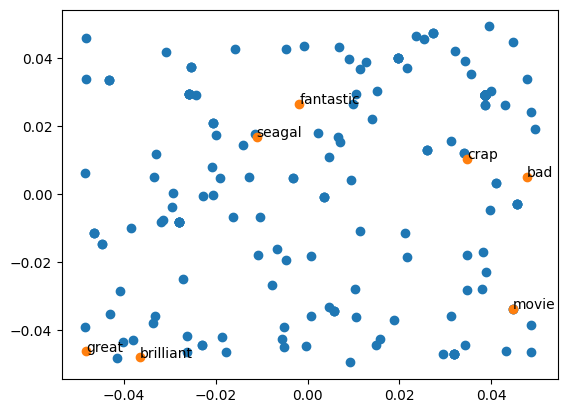

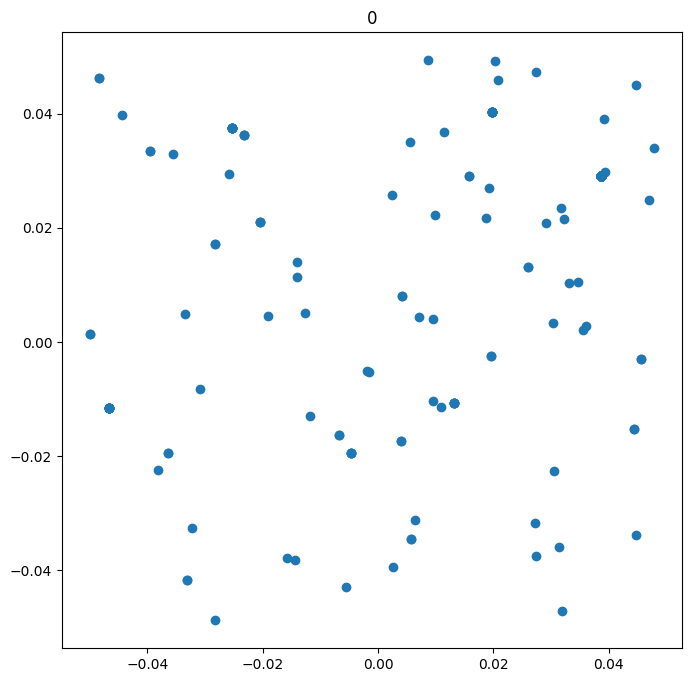

In [ ]:
"9. Implement word embeddings for IMDB dataset. "
from numpy.random import seed
seed(0xdeadbeef)
import tensorflow as tf
tf.random.set_seed(0xdeadbeef)
from tensorflow import keras
imdb = keras.datasets.imdb
num_words = 20000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(seed=1, num_words=num_words)
print(train_data[0])
print('label:', train_labels[0])
vocabulary = imdb.get_word_index()
vocabulary = {k: (v + 3) for k, v in vocabulary.items()}
vocabulary["<PAD>"] = 0
vocabulary["<START>"] = 1
vocabulary["<UNK>"] = 2
vocabulary["<UNUSED>"] = 3
index = {value: key for key, value in vocabulary.items()}
def decode_review(text):
    "converts encoded text to human readable form, each integer in the text is looked up in the index, and replaced by corresponding word"
    return ' '.join([index.get(i, '?') for i in text])
print(decode_review(train_data[0]))
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=vocabulary["<PAD>"], padding='post', maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=vocabulary["<PAD>"], padding='post', maxlen=256)
print(train_data[1])
model = keras.Sequential()
model.add(keras.layers.Embedding(len(vocabulary), 2, input_length=256))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(5))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

import matplotlib.pyplot as plt

def plot_accuracy(history, miny=None):
    acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    epochs = range(len(acc))
    plt.plot(epochs, acc)
    plt.plot(epochs, test_acc)
    if miny:
        plt.ylim(miny, 1.0)
    plt.title('accuracy')
    plt.xlabel('epoch')
    plt.figure()

get_embed_out = keras.backend.function([model.layers[0].input], [model.layers[1].output])
layer_output = get_embed_out([test_data[0]])
print(type(layer_output), len(layer_output), layer_output[0].shape)
words = layer_output[0]
plt.scatter(words[:,0], words[:,1])
review = ['great', 'brilliant', 'crap', 'bad', 'fantastic', 'movie', 'seagal']
enc_review = tf.constant([vocabulary[word] for word in review])
enc_review
words = get_embed_out([enc_review])[0]
plt.scatter(words[:,0], words[:,1])
for i, txt in enumerate(review):
    plt.annotate(txt, (words[i,0], words[i,1]))

import math

def plot_review(i):
    enc_words = test_data[i]
    emb_words = get_embed_out([enc_words])[0]
    plt.figure(figsize=(8,8))
    plt.scatter(emb_words[:,0], emb_words[:,1])
    plt.title(test_labels[i])
    for enc_word, emb_word in zip(enc_words, emb_words):
        word = index[enc_word]
        x, y = emb_word
        if math.sqrt(x*2 + y*2) > 0.2:
            plt.annotate(word, (x, y))
    axes = plt.gca()
    axes.set_xlim([-0.5, 0.5])
    axes.set_ylim([-0.5, 0.5])
    axes.set_aspect('equal', adjustable='box')

plot_review(15)
plot_review(17)
plt.show()

25000 train sequences.
25000 test sequences.
input_train shape: (25000, 500)
input_test shape: (25000, 500)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 77s 472ms/step - loss: 0.6161 - accuracy: 0.6557 - val_loss: 0.4301 - val_accuracy: 0.8340
Epoch 2/10
157/157 [=========

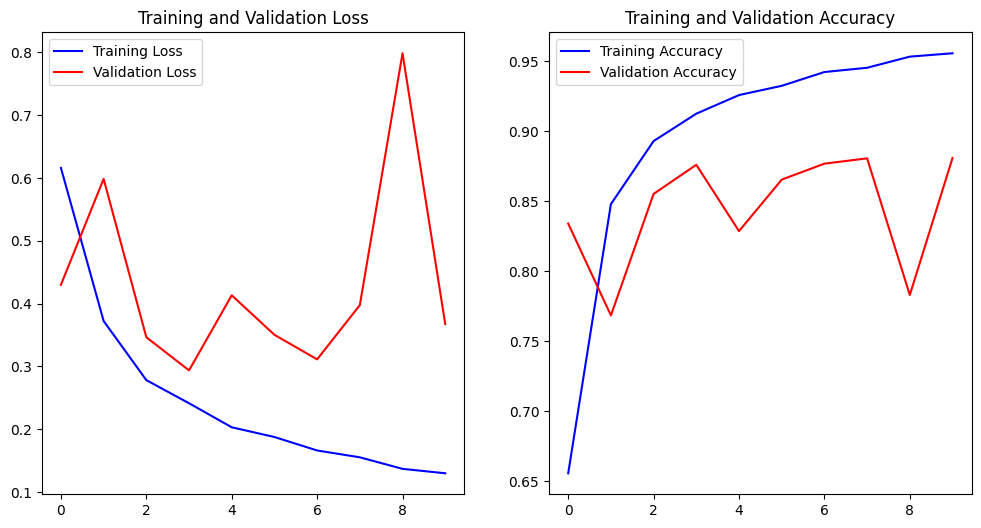

In [ ]:
"10. Implement a Recurrent Neural Network for IMDB movie review classification problem. "
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

max_word_range = 10000

(input_train, output_train), (input_test, output_test) = imdb.load_data(num_words=max_word_range)

print(len(input_train), 'train sequences.')
print(len(input_test), 'test sequences.')

max_word_amount = 500
input_train = pad_sequences(input_train, maxlen=max_word_amount)
input_test = pad_sequences(input_test, maxlen=max_word_amount)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

model = Sequential([
    Embedding(max_word_range, 32, input_length=max_word_amount),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(input_train, output_train, epochs=10, batch_size=128, validation_split=0.2)

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

f, axarr = plt.subplots(1, 2, figsize=(12, 6))
p0 = axarr[0]
p1 = axarr[1]
p0.set_title('Training and Validation Loss')
p1.set_title('Training and Validation Accuracy')

p0I0 = p0.plot(epochs, loss, "-b", label="Training Loss")
p0I1 = p0.plot(epochs, val_loss, "-r", label="Validation Loss")
p1I0 = p1.plot(epochs, acc, "-b", label="Training Accuracy")
p1I1 = p1.plot(epochs, val_acc, "-r", label="Validation Accuracy")

legend0 = p0.legend()
legend1 = p1.legend()

score = model.evaluate(input_test, output_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

predictions = model.predict(input_test[:5])
true_labels = output_test[:5]

print("0 is a negative comment, 1 is a positive comment")

for i in range(len(predictions)):
    print("Prediction:", int(round(predictions[i][0])), ", True Label:", true_labels[i])